# Assignment 7 - Classification Technique

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv(r"C:\Users\HP\ml_assign\Admission_Predict.csv") 

In [5]:
# Selecting necessary columns for prediction
df.columns = df.columns.str.strip()
X = df[["GRE Score", "CGPA"]]  
y = df["Chance of Admit"] 


In [7]:
# Convert the target variable to binary values
y = (y >= 0.5).astype(int)


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Text(0.5, 1.0, 'Distribution of GRE Scores')

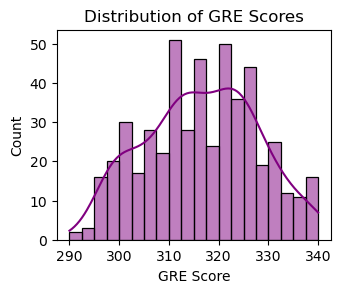

In [11]:
plt.figure(figsize=(12, 6))

# Histogram of GRE Scores
plt.subplot(2, 3, 1)
sns.histplot(df["GRE Score"], bins=20, kde=True, color='purple')
plt.title("Distribution of GRE Scores")

Text(0.5, 1.0, 'GRE Score vs. Chance of Admit')

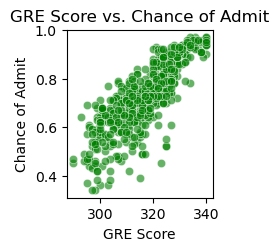

In [12]:
plt.subplot(2, 3, 3)
sns.scatterplot(x=df["GRE Score"], y=df["Chance of Admit"], alpha=0.6, color='green')
plt.title("GRE Score vs. Chance of Admit")

In [15]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
# Predictions
y_pred = clf.predict(X_test)


In [21]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.91
Confusion Matrix:
 [[ 4  5]
 [ 4 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.95      0.96      0.95        91

    accuracy                           0.91       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.91      0.91      0.91       100

